In [13]:
import os
import time

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tqdm.auto import tqdm

from foldingdiff import sampling, plotting

In [3]:
def time_to_sample_length(length: int, num_samples: int, **kwargs) -> float:
    """Returns the time to sample a given number of samples for a given length."""
    start_t = time.time()

    # Run the sampling code
    sampling.sample_simple(
        "wukevin/foldingdiff_cath",
        n=num_samples,
        sweep_lengths=[length, length + 1],
        **kwargs
    )

    return time.time() - start_t

time_to_sample_length(50, 100)

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


30.458067893981934

In [4]:
gpu_times = {}
for n in tqdm([50, 60, 70, 80, 90, 100, 110, 120]):
    gpu_times[n] = time_to_sample_length(n, 100)

  0%|          | 0/8 [00:00<?, ?it/s]

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


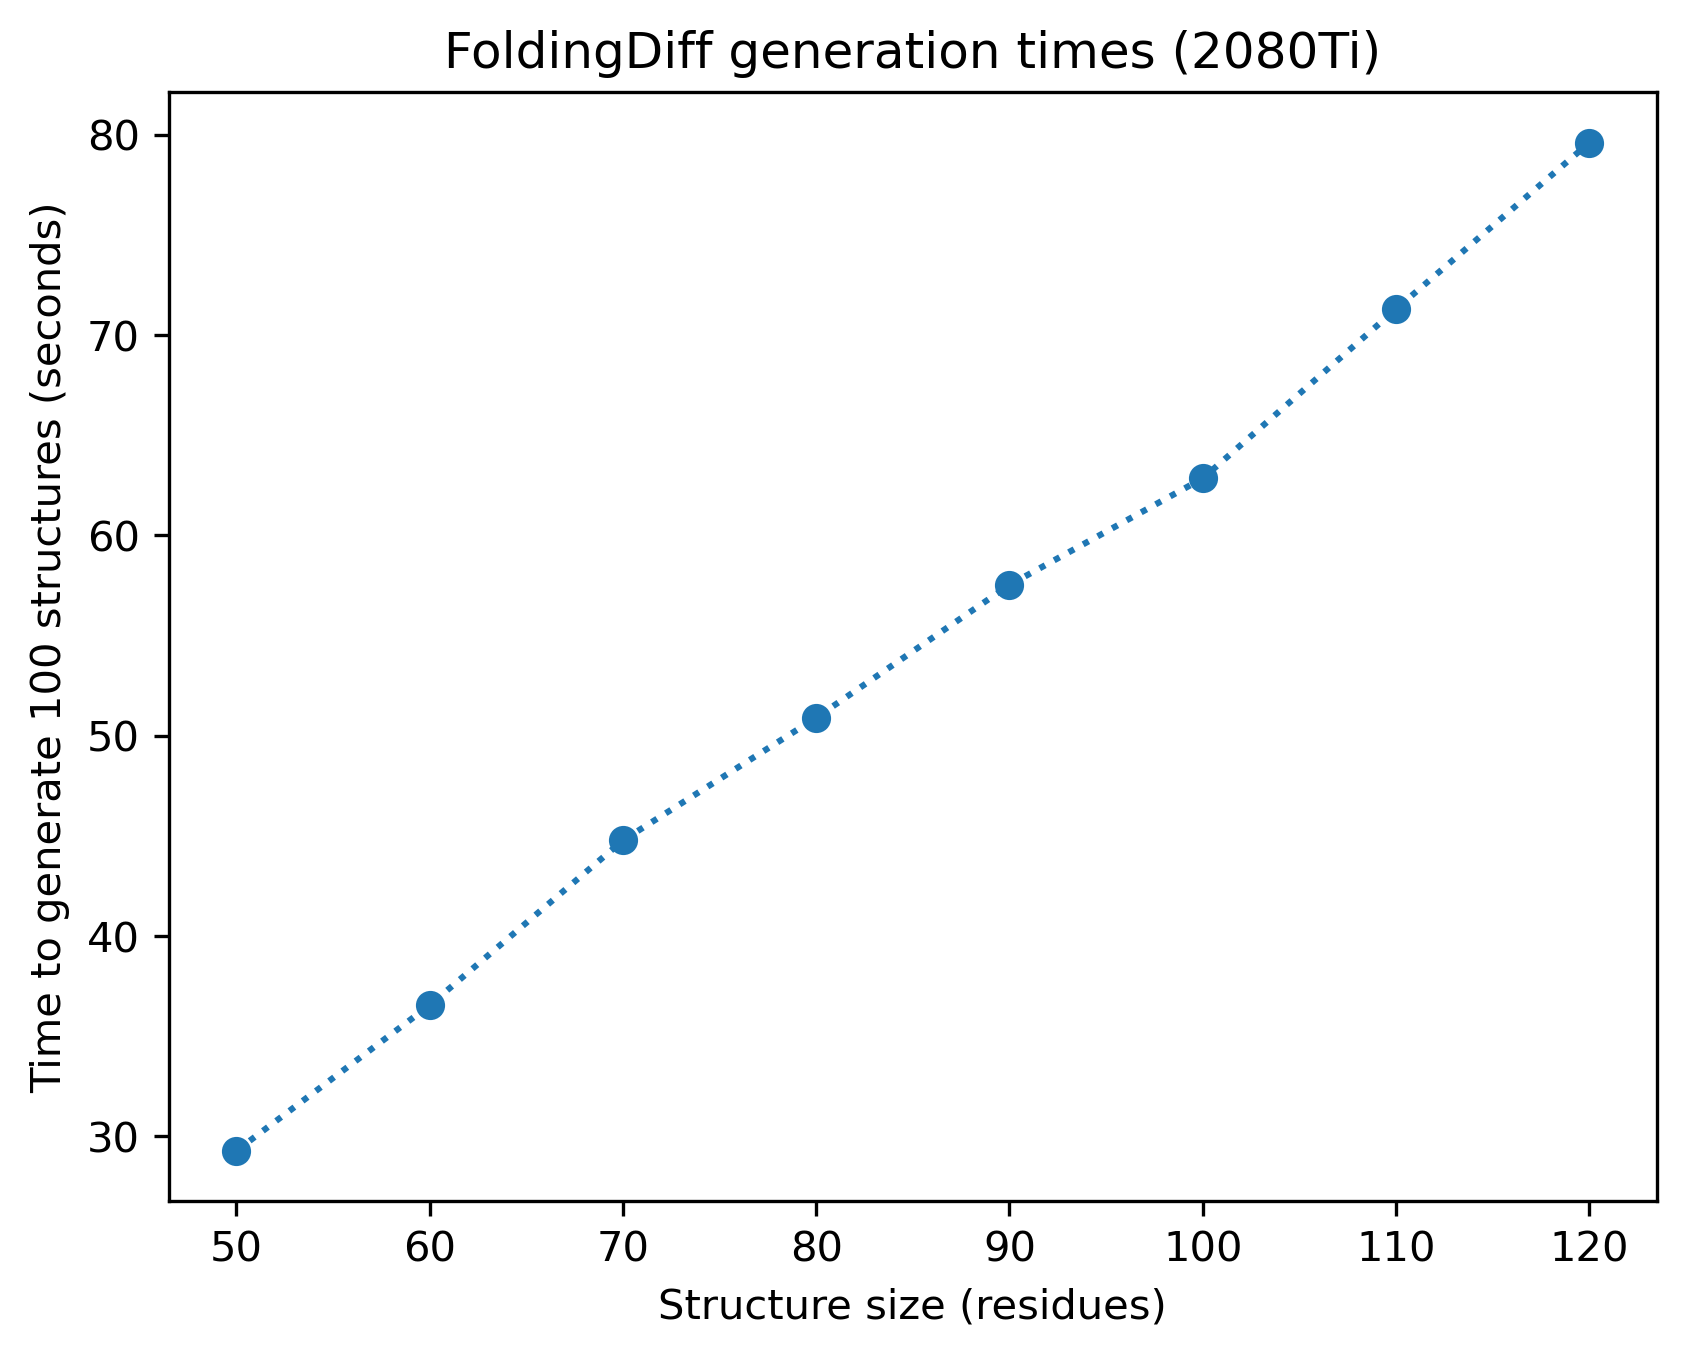

In [15]:
fig, ax = plt.subplots(dpi=300)
ax.plot(
    gpu_times.keys(),
    gpu_times.values(),
    label="GPU",
    marker='o',
    linestyle='dotted',
)
ax.set(
    xlabel="Structure size (residues)",
    ylabel="Time to generate 100 structures (seconds)",
    title="FoldingDiff generation times (2080Ti)",
)
fig.savefig(os.path.join(plotting.PLOT_DIR, "generation_time.pdf"), bbox_inches='tight')
fig.show()